In [9]:
# External Modules
import numpy as np
import matplotlib.pyplot as plt
from math import e
%matplotlib inline

In [10]:
# class 0:
# covariance matrix and mean
cov0 = np.array([[5,-4],[-4,4]])
mean0 = np.array([2.,3])
# number of data points
m0 = 1000

# class 1
# covariance matrix
cov1 = np.array([[5,-3],[-3,3]])
mean1 = np.array([1.,1])
# number of data points
m1 = 1000

# generate m gaussian distributed data points with
# mean and cov.
r0 = np.random.multivariate_normal(mean0, cov0, m0)
r1 = np.random.multivariate_normal(mean1, cov1, m1)



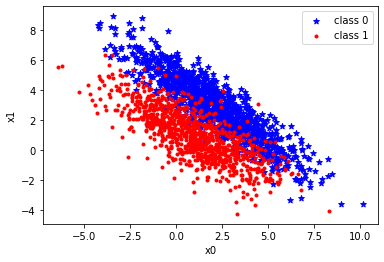

In [11]:
plt.scatter(r0[...,0], r0[...,1], c='b', marker='*', label="class 0")
plt.scatter(r1[...,0], r1[...,1], c='r', marker='.', label="class 1")
plt.xlabel("x0")
plt.ylabel("x1")
plt.legend()
plt.show()

X = np.concatenate((r0,r1))
y = np.ones(len(r0)+len(r1))
y[:len(r0),] = 0

# Logistic Function  

$$f(x) = \frac{1}{1+e^{-x}}$$
Standard logistic function with parameters $$k = 1, x_0=0, L=1$$
Standard parameters because original function is
$$f(x)= \frac{L}{1+ e^{-k(x-x_0)}}$$
$\begin{align} x_0\end{align}$ = the $\begin{align} x\end{align}$ value of the sigmoids midpoint
$$\newline$$
$\begin{align} L\end{align}$ = the curves maximum value 
$$\newline$$
$\begin{align} k\end{align}$ = the logistic growth rate or steepness of the curve

In [12]:
def logistic_function(x):

    return (1/(1+e**(-x)))
    #ich habe ein array mit 2000 positionen und ich muss auf jedes array die sigmoid function anwenden

interResult = (map(logistic_function, X))
#print(np.array(list(result)))
endResult = np.array(list(interResult))
print(endResult)


[[0.93204791 0.91736099]
 [0.99330615 0.5426669 ]
 [0.99669588 0.37315699]
 ...
 [0.16725509 0.36727394]
 [0.04640861 0.91165994]
 [0.6256742  0.75621884]]


<function matplotlib.pyplot.show(close=None, block=None)>

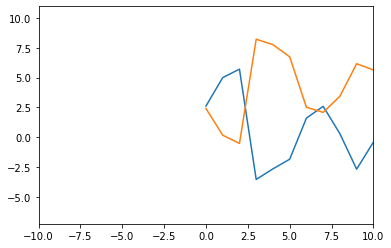

In [13]:
#plotting the function
plt.xlim([-10,10])
plt.plot(X)

plt.show

# Logistic Hypothesis

$\begin{align} h_\Theta(\vec x) = \sigma(\vec x'^T \cdot \vec \theta) \end{align}$ = hypothesis

In [20]:
def logistic_hypothesis(theta):
    #in jeder runde von lambda wird der jeweilige Wert vom index der thetas mit dem werten des gegenwärtigen index von x berechnet. Davon werden alle werte in jeder runde miteinander summiert.
    return lambda x: np.sum((1/(1+e**(theta*np.insert(-x, 0, 1, axis=1)))), axis=1)
    ''' Combines given list argument in a logistic equation and returns it as a function
    Args:
        thetas: list of coefficients
        
    Returns:
        lambda that models a logistic function based on thetas and x
    '''
    raise NotImplementedError("You should implement this function")

### Uncomment to test your implementation
theta = np.array([1.1, 2.0, -.9])
h = logistic_hypothesis(theta)
print(h(X))

#here is something wrong because sigmoid is in range of 0-1

[1.34726893 1.71127652 1.86436143 ... 0.90851285 0.36113489 1.25140338]


# Cross entropy costs

\begin{equation}
    \text{loss}_{({\vec x}^{(i)}, y^{(i)})}(\vec \theta) = -y^{(i)} \cdot log(h_{\Theta} ({\vec x}^{(i)})) - (1-y^{(i)}) \cdot log(1-h_\Theta({\vec x}^{(i)}))
\end{equation}


In [ ]:
def cross_entropy_costs(h, X, y):
    return lambda
    ''' Implements cross-entropy as a function costs(theta) on given traning data 
    Args:
        h: the hypothesis as function
        x: features as 2D array with shape (m_examples, n_features)  
        y: ground truth labels for given features with shape (m_examples)
        
    Returns:
        lambda costs(theta) that models the cross-entropy for each x^i
    '''
    raise NotImplementedError("You should implement this function")

### Uncomment to test your implementation
#theta = np.array([1.,2.,3.])
#costs = cross_entropy_costs(logistic_hypothesis, X, y)
#print(costs(theta))

In [8]:
print(len(y))

2000
